<a href="https://colab.research.google.com/github/Colsai/covid_trends_mapping/blob/main/USA_MD_Covid_Mapping_Short_Project_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Very Basic Look at Covid-19 Dataset
- Focus on USA/MD/VA
- NYT Datasets Used

In [1]:
#Data taken from NYT Github

#Datetime for Time Series
import datetime

#Import Packages for Data
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

from scipy.stats import spearmanr
#Import Plotly
import plotly
import plotly.graph_objs as go
plt.style.use('seaborn-white')


In [2]:
#Cases by day from beginning (US)

#USA Data will be the dataframe for national data
usa_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
us_df = pd.read_csv(usa_url)

#Counties Data will be the data for County Data
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
counties_df = pd.read_csv(counties_url)

#States Data will be the data for State Data
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states_df = pd.read_csv(states_url)

In [3]:
us_df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [4]:
counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
states_df.sample(5)

,date,state,fips,cases,deaths
8366,2020-08-01,Utah,49,40754,312
10103,2020-09-02,Minnesota,27,77137,1882
3635,2020-05-07,Texas,48,36682,1016
1999,2020-04-08,Colorado,8,5655,192
2695,2020-04-20,Puerto Rico,72,1252,42


In [6]:
days_after = []
for i in range(1,len(us_df['date'].to_list()) + 1):
    days_after.append(i)

us_df.insert(1,"days_since_start", days_after)

In [7]:
us_df.dtypes

date                object
days_since_start     int64
cases                int64
deaths               int64
dtype: object

In [8]:
from sklearn import preprocessing

cov_cases = us_df['cases']
cov_deaths = us_df['deaths']

cases_nom = preprocessing.scale(cov_cases)
cdeaths_nom = preprocessing.scale(cov_deaths)

In [9]:
cov_cases

0             1
1             1
2             1
3             2
4             3
         ...   
302    11614076
303    11801516
304    12000149
305    12172077
306    12313111
Name: cases, Length: 307, dtype: int64

In [10]:
us_df.head()

,date,days_since_start,cases,deaths
0,2020-01-21,1,1,0
1,2020-01-22,2,1,0
2,2020-01-23,3,1,0
3,2020-01-24,4,2,0
4,2020-01-25,5,3,0


In [11]:
us_df['deaths'].dtypes

dtype('int64')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



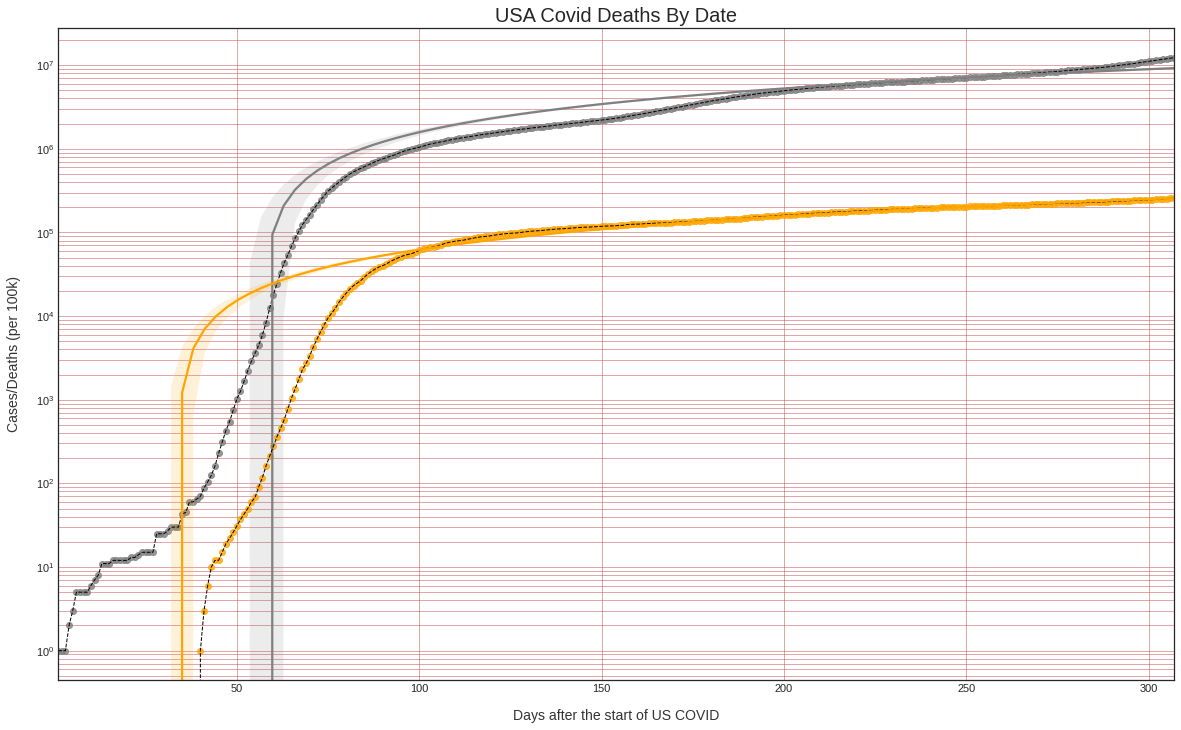

In [12]:
#Sets the Plot
date = us_df['days_since_start']
cases = us_df['cases']
deaths = us_df['deaths']

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(date, cases, '--', color = 'black', linewidth = 1)
sns.regplot(date, cases, color = 'gray')

ax.plot(date, deaths, '--', color = 'black', linewidth = 1)
sns.regplot(date, deaths, color = 'orange')

#Graphics Stuff
ax.set_title("USA Covid Deaths By Date", fontsize = 20)
plt.yscale("log")
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



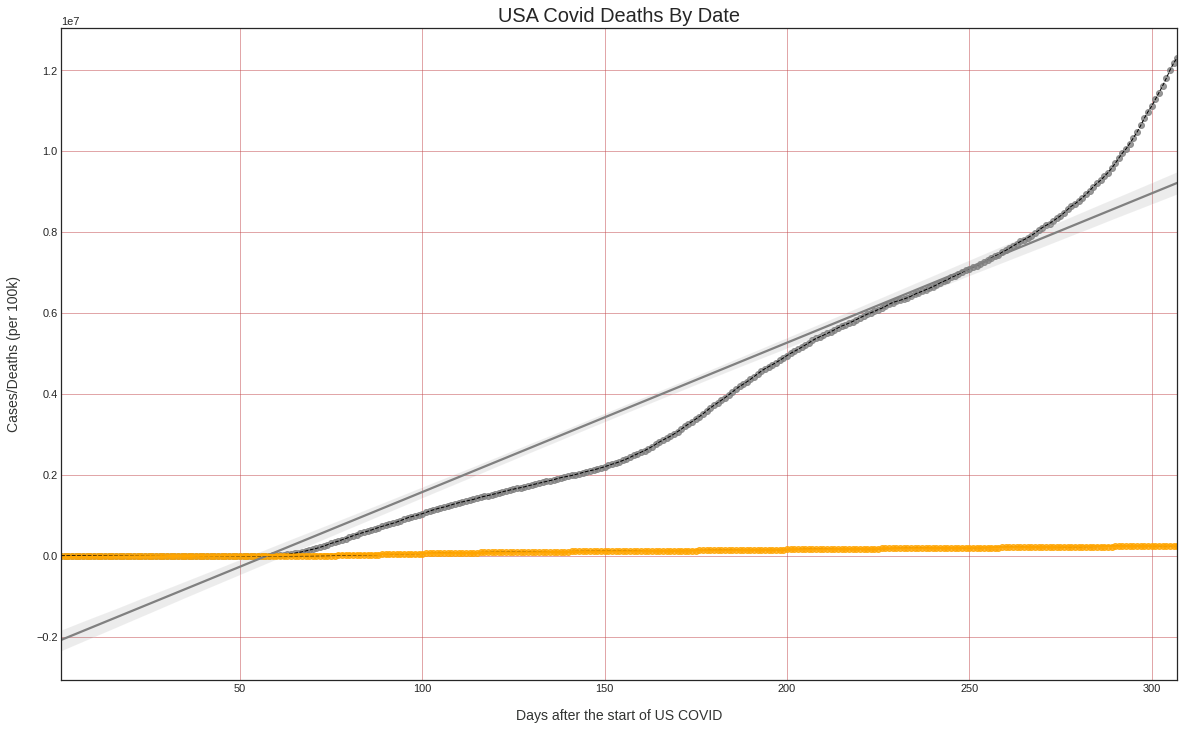

In [13]:
#Sets the Plot
date = us_df['days_since_start']
cases = us_df['cases']
deaths = us_df['deaths']

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(date, cases, '--', color = 'black', linewidth = 1)
sns.regplot(date, cases, color = 'gray')

ax.plot(date, deaths, '--', color = 'black', linewidth = 1)
sns.regplot(date, deaths, color = 'orange')

#Graphics Stuff
ax.set_title("USA Covid Deaths By Date", fontsize = 20)
plt.yscale("linear")
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");

In [14]:
#Let's see what the percent increase is each day. Are cases still going up exponentially?

In [15]:
#This is a simple function that returns items based on their change over time. 
def percent_change(input_list, rounded_val=2):
    percent_list = []

    for this_year in input_list:
        try:
              pct_increase = ((this_year - last_year) / last_year) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year = this_year

    percent_list = [round(i, rounded_val) for i in percent_list] #This function combines rounding inside of it, since percents are easier to use

    return percent_list

In [16]:
cases_pct = percent_change(us_df['cases'].to_list())
deaths_pct = percent_change(us_df['deaths'].to_list())

In [17]:
us_df.insert(3, "Cases Percent Increase", cases_pct)
us_df.insert(5, "Deaths Percent Increase", deaths_pct)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



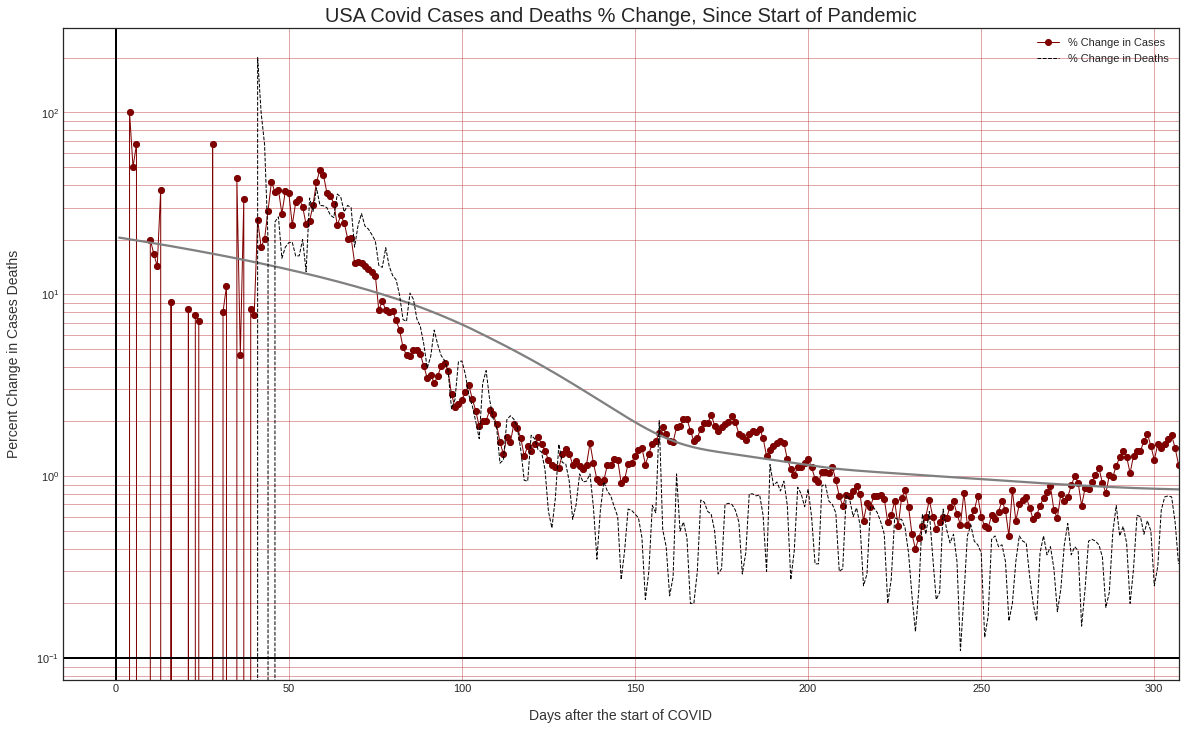

In [65]:
#Date by Rate of Change
date = us_df['days_since_start']
pct_chg_cases = us_df['Cases Percent Increase']
pct_chg_deaths = us_df['Deaths Percent Increase']

fig, ax = plt.subplots(figsize = (20,12), sharex = True)

ax.plot(date, pct_chg_cases, '-o', color = 'maroon', linewidth = 1, label = '% Change in Cases')
sns.regplot(date, pct_chg_cases,  color = 'gray', lowess=True)

ax.plot(date, pct_chg_deaths, '--', color = 'black', linewidth = 1, label = '% Change in Deaths')
#sns.regplot(date, pct_chg_deaths, color = 'orange')

#Graphics Stuff
ax.set_title("USA Covid Cases and Deaths % Change, Since Start of Pandemic", fontsize = 20)
plt.yscale("log")
ax.legend()
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.axhline(y=10**-1, color = "black",linewidth=2)
ax.axvline(x=0, color = "black",linewidth=2)
ax.set_xlabel("Days after the start of COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Percent Change in Cases Deaths", labelpad=15, fontsize=14, color="#333533");

In [66]:
us_df

,date,days_since_start,cases,Cases Percent Increase,deaths,Deaths Percent Increase
0,2020-01-21,1,1,0.00,0,0.00
1,2020-01-22,2,1,0.00,0,0.00
2,2020-01-23,3,1,0.00,0,0.00
3,2020-01-24,4,2,100.00,0,0.00
4,2020-01-25,5,3,50.00,0,0.00
...,...,...,...,...,...,...
302,2020-11-18,303,11614076,1.51,250411,0.77
303,2020-11-19,304,11801516,1.61,252373,0.78
304,2020-11-20,305,12000149,1.68,254325,0.77
305,2020-11-21,306,12172077,1.43,255754,0.56


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



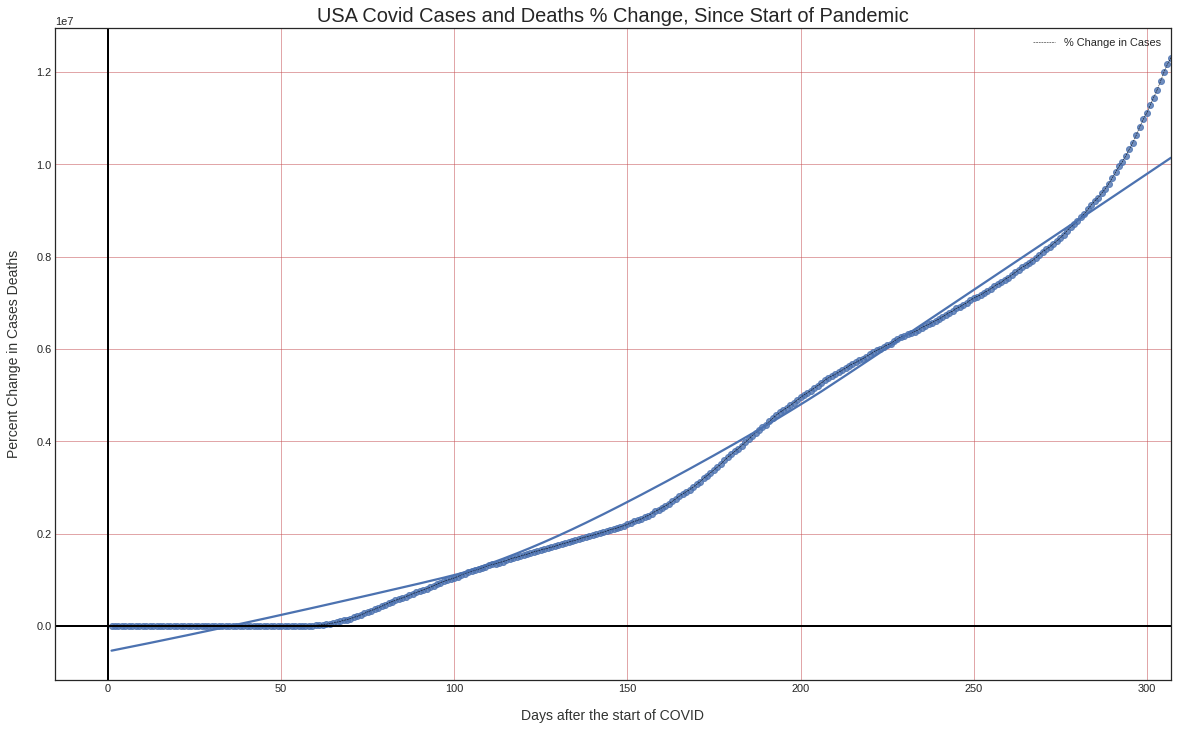

In [79]:
#Date by Rate of Change
date = us_df['days_since_start']
cases = us_df['cases']
deaths = us_df['deaths']

fig, ax = plt.subplots(figsize = (20,12), sharex = True)

ax.plot(date, cases, '--', color = 'black', linewidth = .5, label = '% Change in Cases')
sns.regplot(date, cases, lowess=True)

#Graphics Stuff
ax.set_title("USA Covid Cases Increase", fontsize = 20)
plt.yscale("linear")
ax.legend()
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.axhline(y=10**-1, color = "black",linewidth=2)
ax.axvline(x=0, color = "black",linewidth=2)
ax.set_xlabel("Days after the start of COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Percent Change in Cases Deaths", labelpad=15, fontsize=14, color="#333533");

In [19]:
#Small function to return states
def state_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [20]:
states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [21]:
def date_column(add_to_df, start = 1, column = 1):
    days_after = []

    for i in range(start,len(add_to_df['date'].to_list()) + 1):
        days_after.append(i)
    
    add_to_df.insert(column, "Days After", days_after)

In [22]:
#Run State_Finder
md_df = state_finder(states_df,"state", "Maryland")
va_df = state_finder(states_df,"state", "Virginia")

In [23]:
#Date to start from
md_start = len(us_df['date']) - len(md_df['date']) - 1 
va_start = len(us_df['date']) - len(va_df['date']) - 1

In [24]:
date_column(md_df)
date_column(va_df)

In [25]:
va_df

,date,Days After,state,fips,cases,deaths
380,2020-03-07,1,Virginia,51,1,0
415,2020-03-08,2,Virginia,51,2,0
452,2020-03-09,3,Virginia,51,5,0
491,2020-03-10,4,Virginia,51,8,0
535,2020-03-11,5,Virginia,51,10,0
...,...,...,...,...,...,...
14364,2020-11-18,257,Virginia,51,208833,3860
14419,2020-11-19,258,Virginia,51,210787,3896
14474,2020-11-20,259,Virginia,51,213331,3912
14529,2020-11-21,260,Virginia,51,215679,3938


In [26]:
state_cases_pct = percent_change(md_df['cases'].to_list())
state_death_pct = percent_change(md_df['deaths'].to_list())

md_df.insert(4, "percent cases", state_cases_pct)
md_df.insert(6, "percent deaths", state_death_pct)

In [27]:
state_cases_pct = percent_change(va_df['cases'].to_list())
state_death_pct = percent_change(va_df['deaths'].to_list())

va_df.insert(4, "percent cases", state_cases_pct)
va_df.insert(6, "percent deaths", state_death_pct)

In [28]:
va_df.head()

,date,Days After,state,fips,percent cases,cases,percent deaths,deaths
380,2020-03-07,1,Virginia,51,0.0,1,0.0,0
415,2020-03-08,2,Virginia,51,100.0,2,0.0,0
452,2020-03-09,3,Virginia,51,150.0,5,0.0,0
491,2020-03-10,4,Virginia,51,60.0,8,0.0,0
535,2020-03-11,5,Virginia,51,25.0,10,0.0,0


In [29]:
md_df = md_df.iloc[2:]

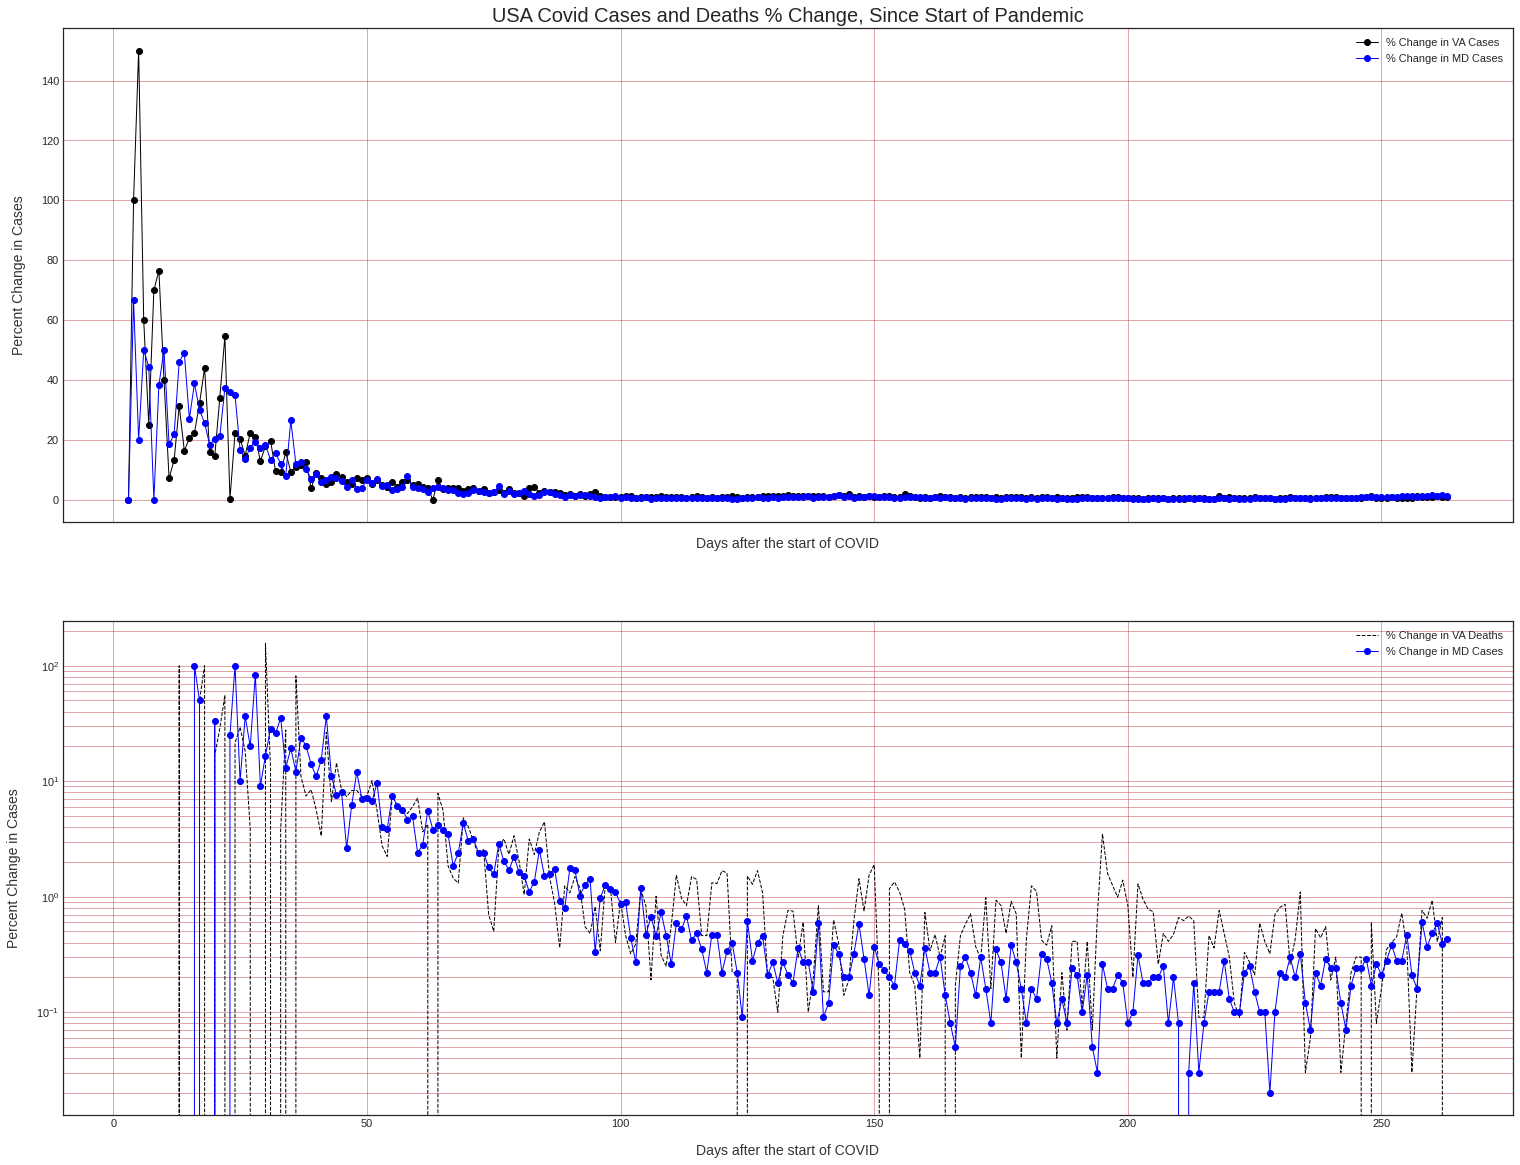

In [30]:
#Date by Rate of Change
date = md_df['Days After']
va_chg_cases = va_df['percent cases']
va_chg_deaths = va_df['percent deaths']

md_chg_cases = md_df['percent cases']
md_chg_deaths  = md_df['percent deaths']

fig, ax = plt.subplots(2, figsize = (26,20), sharex = True)

ax[0].plot(date, va_chg_cases, '-o', color = 'black', linewidth = 1, label = '% Change in VA Cases')
ax[1].plot(date, va_chg_deaths, '--', color = 'black', linewidth = 1, label = '% Change in VA Deaths')
ax[0].plot(date, md_chg_cases , '-o', color = 'blue', linewidth = 1, label = '% Change in MD Cases')
ax[1].plot(date, md_chg_deaths , '-o', color = 'blue', linewidth = 1, label = '% Change in MD Cases')

#Graphics Stuff
plt.yscale("log")
ax[0].set_title("USA Covid Cases and Deaths % Change, Since Start of Pandemic", fontsize = 20)
ax[0].legend()
ax[0].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax[0].set_xlabel("Days after the start of COVID", labelpad=15, fontsize=14, color="#333533");
ax[0].set_ylabel("Percent Change in Cases", labelpad=15, fontsize=14, color="#333533");

ax[1].legend()
ax[1].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax[1].set_xlabel("Days after the start of COVID", labelpad=15, fontsize=14, color="#333533");
ax[1].set_ylabel("Percent Change in Cases", labelpad=15, fontsize=14, color="#333533");


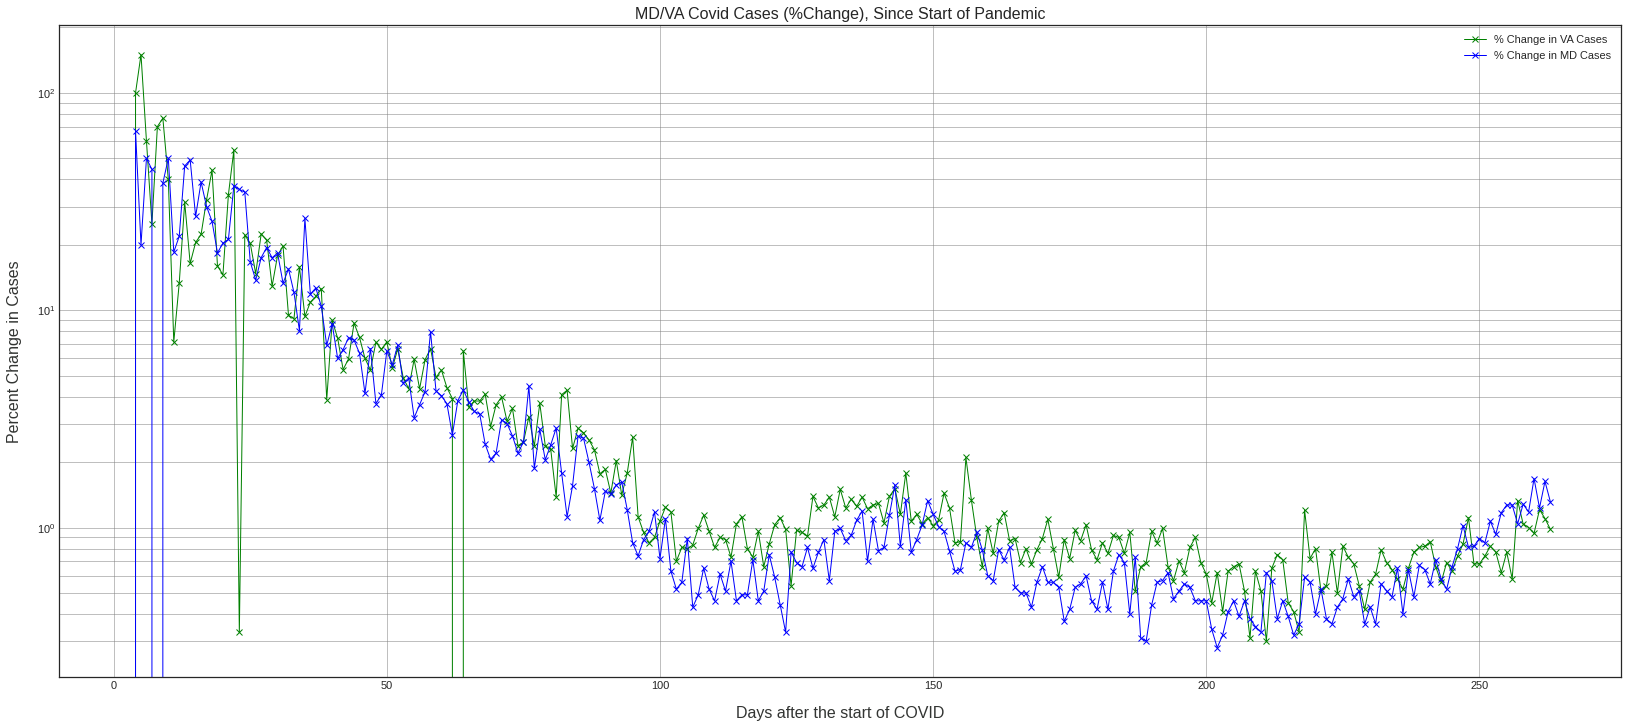

In [31]:
#Date by Rate of Change
date = md_df['Days After']
va_chg_cases = va_df['percent cases']
va_chg_deaths = va_df['percent deaths']

md_chg_cases = md_df['percent cases']
md_chg_deaths = md_df['percent deaths']

fig, ax = plt.subplots(figsize = (28,12), sharex = True)

ax.plot(date, va_chg_cases, '-x', color = 'green', linewidth = 1, label = '% Change in VA Cases')
ax.plot(date, md_chg_cases , '-x', color = 'blue', linewidth = 1, label = '% Change in MD Cases')

#Graphics Stuff
plt.yscale("log")
ax.set_title("MD/VA Covid Cases (%Change), Since Start of Pandemic", fontsize = 16)
ax.legend()
ax.grid(which = 'both', color='gray', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of COVID", labelpad=15, fontsize=16, color="#333533");
ax.set_ylabel("Percent Change in Cases", labelpad=15, fontsize=16, color="#333533");

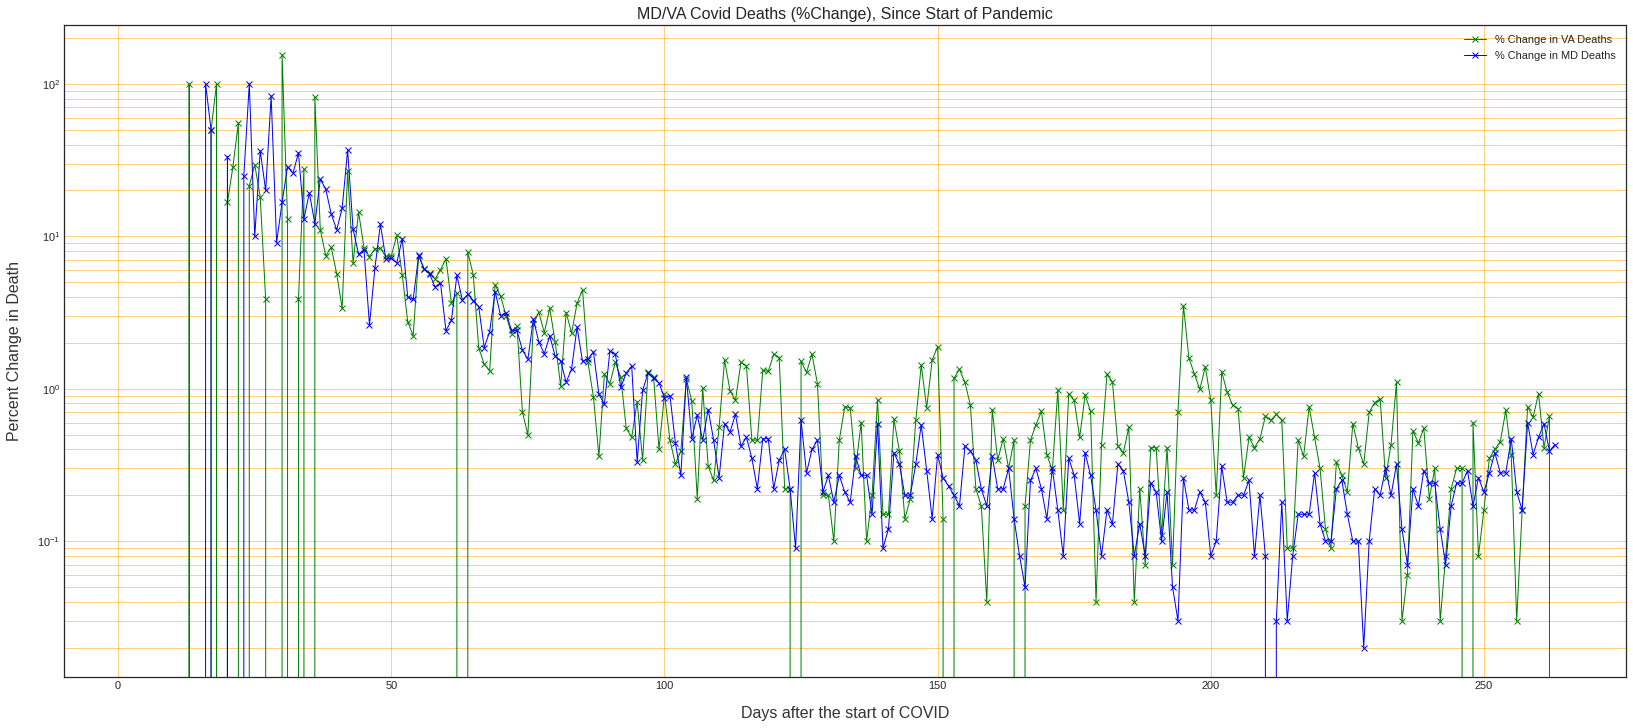

In [32]:
#Date by Rate of Change
date = md_df['Days After']
va_chg_cases = va_df['percent cases']
va_chg_deaths = va_df['percent deaths']

md_chg_cases = md_df['percent cases']
md_chg_deaths = md_df['percent deaths']

fig, ax = plt.subplots(figsize = (28,12), sharex = True)

ax.plot(date, va_chg_deaths, '-x', color = 'green', linewidth = 1, label = '% Change in VA Deaths')
ax.plot(date, md_chg_deaths , '-x', color = 'blue', linewidth = 1, label = '% Change in MD Deaths')

#Graphics Stuff
plt.yscale("log")
ax.set_title("MD/VA Covid Deaths (%Change), Since Start of Pandemic", fontsize = 16)
ax.legend()
ax.grid(which = 'both', color='orange', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of COVID", labelpad=15, fontsize=16, color="#333533");
ax.set_ylabel("Percent Change in Death", labelpad=15, fontsize=16, color="#333533");


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



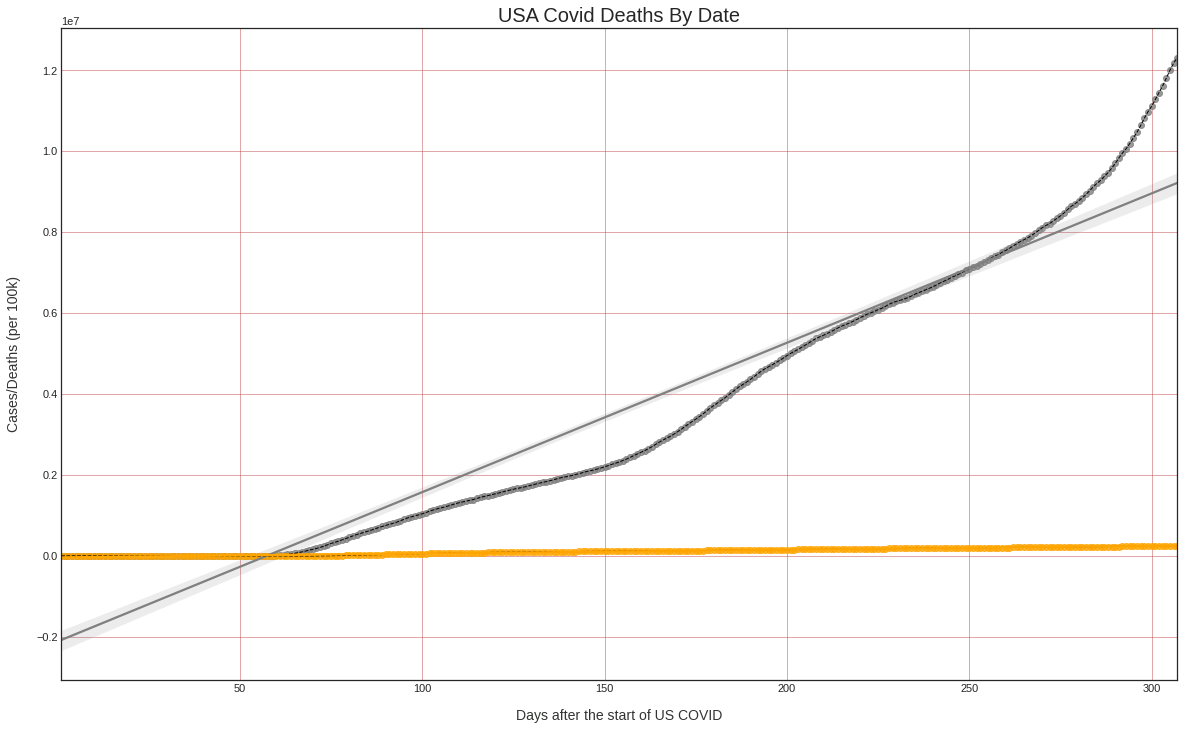

In [33]:
#Sets the Plot
date = us_df['days_since_start']
pct_chg_cases = us_df['cases']
pct_chg_deaths = us_df['deaths']

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(date, cases, '--', color = 'black', linewidth = 1)
sns.regplot(date, cases, color = 'gray')

ax.plot(date, deaths, '--', color = 'black', linewidth = 1)
sns.regplot(date, deaths, color = 'orange')

#Graphics Stuff
ax.set_title("USA Covid Deaths By Date", fontsize = 20)
plt.yscale("linear")
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");

Text(0.5, 1.0, 'Covid Cases to deaths')

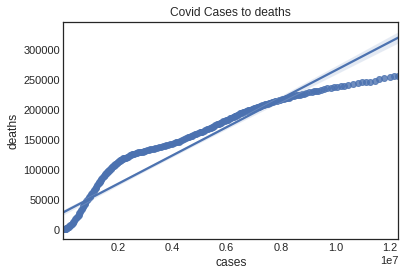

In [34]:
#Have cases meant more deaths?
ax = sns.regplot(x='cases', y='deaths',data=us_df, fit_reg=True) 
ax.set_title("Covid Cases to deaths")

In [35]:
counties_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [36]:
counties_df['county']

0          Snohomish
1          Snohomish
2          Snohomish
3               Cook
4          Snohomish
             ...    
758238    Sweetwater
758239         Teton
758240         Uinta
758241      Washakie
758242        Weston
Name: county, Length: 758243, dtype: object

In [37]:
counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [38]:
montgomeries_df = state_finder(counties_df, "county", "Montgomery")
moco_df = state_finder(montgomeries_df, "state", "Maryland")

In [39]:
moco_df.head()

,date,county,state,fips,cases,deaths
555,2020-03-05,Montgomery,Maryland,24031.0,3,0
615,2020-03-06,Montgomery,Maryland,24031.0,3,0
700,2020-03-07,Montgomery,Maryland,24031.0,3,0
802,2020-03-08,Montgomery,Maryland,24031.0,4,0
925,2020-03-09,Montgomery,Maryland,24031.0,4,0


In [40]:
date_column(moco_df)

In [41]:
moco_df.head()

,date,Days After,county,state,fips,cases,deaths
555,2020-03-05,1,Montgomery,Maryland,24031.0,3,0
615,2020-03-06,2,Montgomery,Maryland,24031.0,3,0
700,2020-03-07,3,Montgomery,Maryland,24031.0,3,0
802,2020-03-08,4,Montgomery,Maryland,24031.0,4,0
925,2020-03-09,5,Montgomery,Maryland,24031.0,4,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



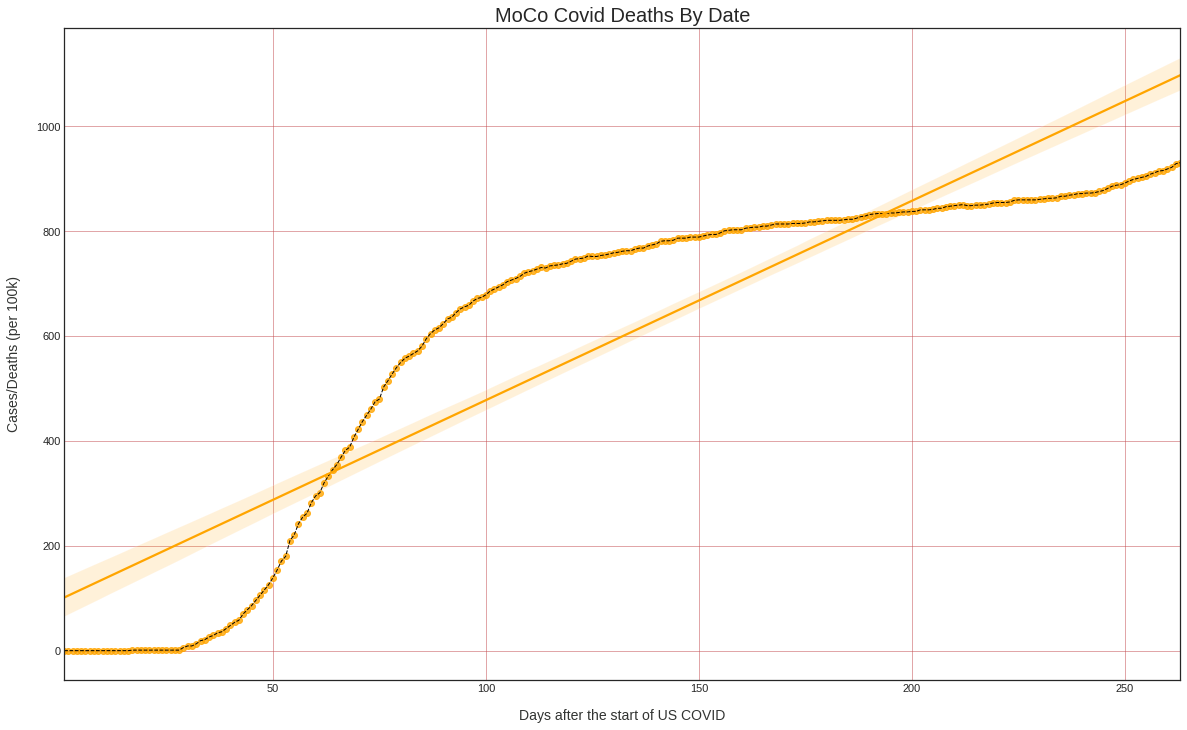

In [42]:
#Sets the Plot
date = moco_df['Days After']
pct_chg_cases = moco_df['cases']
pct_chg_deaths = moco_df['deaths']

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(date, pct_chg_deaths, '--', color = 'black', linewidth = 1)
sns.regplot(date, pct_chg_deaths, color = 'orange')

#Graphics Stuff
ax.set_title("MoCo Covid Deaths By Date", fontsize = 20)
plt.yscale("linear")
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");

In [43]:
#Add the data frames into as lists
state_cases_pct = percent_change(moco_df['cases'].to_list())
state_death_pct = percent_change(moco_df['deaths'].to_list())

moco_df.insert(4, "percent cases", state_cases_pct)
moco_df.insert(6, "percent deaths", state_death_pct)

In [44]:
moco_df

,date,Days After,county,state,percent cases,fips,percent deaths,cases,deaths
555,2020-03-05,1,Montgomery,Maryland,0.00,24031.0,0.00,3,0
615,2020-03-06,2,Montgomery,Maryland,0.00,24031.0,0.00,3,0
700,2020-03-07,3,Montgomery,Maryland,0.00,24031.0,0.00,3,0
802,2020-03-08,4,Montgomery,Maryland,33.33,24031.0,0.00,4,0
925,2020-03-09,5,Montgomery,Maryland,0.00,24031.0,0.00,4,0
...,...,...,...,...,...,...,...,...,...
743224,2020-11-18,259,Montgomery,Maryland,0.88,24031.0,0.11,29874,916
746471,2020-11-19,260,Montgomery,Maryland,1.56,24031.0,0.33,30339,919
749718,2020-11-20,261,Montgomery,Maryland,0.93,24031.0,0.33,30621,922
752965,2020-11-21,262,Montgomery,Maryland,0.99,24031.0,0.76,30924,929


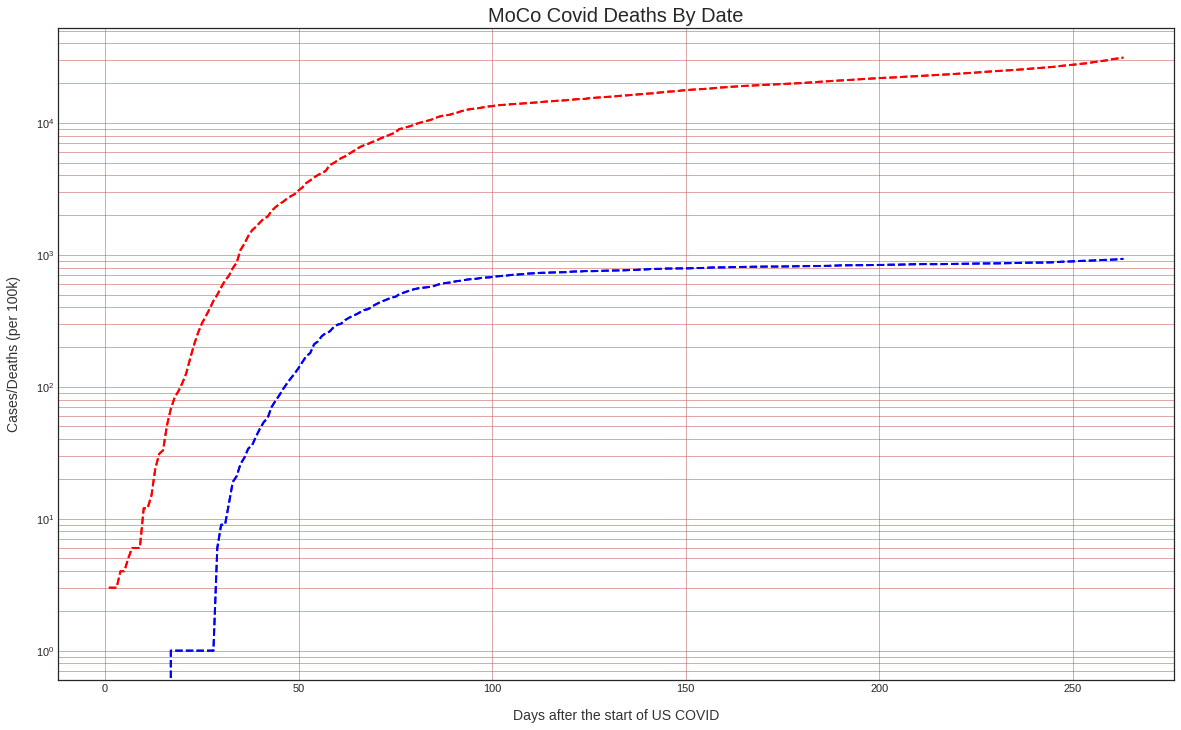

In [45]:
#Sets the Plot
date = moco_df['Days After']
moco_chg_cases = moco_df['percent cases']
moco_chg_deaths = moco_df['percent deaths']

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(date, pct_chg_cases, '--', color = 'red', linewidth = 2)
ax.plot(date, pct_chg_deaths, '--', color = 'blue', linewidth = 2)
ax.plot(date, pct_chg_cases, '--', color = 'red', linewidth = 2)
ax.plot(date, pct_chg_deaths, '--', color = 'blue', linewidth = 2)

#Graphics Stuff
ax.set_title("MoCo Covid Deaths By Date", fontsize = 20)
plt.yscale("log")
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Cases/Deaths (per 100k)", labelpad=15, fontsize=14, color="#333533");